# (USA Flights Performance in 2008 Presentation)
## by (Manal Al-Jadaan)

## Investigation Overview

> This presentation provide some insights about the flights performance in USA in 2008 in terms of delay and cancellation. These insights resulted from analyzing the factors that have an influnce on the flights performance.  

## Dataset Overview

> Flight dataset consists of flight arrival and departure details for all commercial flights within the USA for year 2008. it has been provided by Bureau of Transportation Statistics (BTS) website where all the fields have been explained in details. Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_2008=pd.read_csv('2008.csv')

## What is the main reason for cancellation?

> The weather is the main cause for flights cancellation in 2008 followed by carrier. Security reason is the lowest which mean that few cancellation happened due to security reason.

Text(0.5, 1.0, 'Main Reason for Cancellations in 2008')

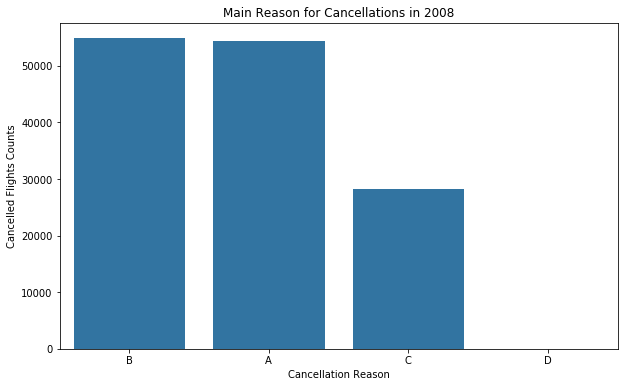

In [4]:
# set the order and color of the plot
order=df_2008.CancellationCode.value_counts()
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 6])
sb.countplot(data=df_2008, x='CancellationCode', color=base_color, order=order.index)
plt.xlabel('Cancellation Reason')
plt.ylabel('Cancelled Flights Counts')
plt.title('Main Reason for Cancellations in 2008')

## In which time of year the most cancellation happened?
> When we move to the time factor in term of days, Friday had the most cancellations. This might be due to the starting of weekend holiday.

Text(0, 0.5, 'Cancelled Flights Counts')

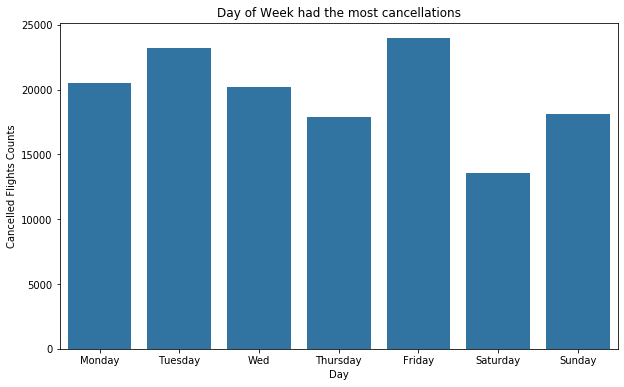

In [7]:
# using the dataframe that conatins the cancelled flights only, specifying the days labels and bars color
plt.figure(figsize = [10, 6])
plot=sb.countplot(data=df_cancelled, x='DayOfWeek', color=base_color )
plot.set_xticklabels(['Monday', 'Tuesday','Wed', 'Thursday','Friday','Saturday', 'Sunday'])
plt.title('Day of Week had the most cancellations')
plt.xlabel('Day')
plt.ylabel('Cancelled Flights Counts')

and in terms of months: December, February, and June are the months with hight cancellations.

Text(0, 0.5, 'Cancelled Flights Counts')

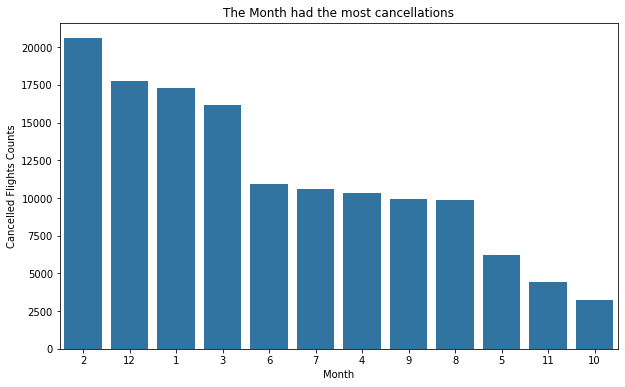

In [8]:
# using the dataframe that conatins the cancelled flights only, specifying the days labels and bars color
plt.figure(figsize = [10, 6])
month_order=df_cancelled.Month.value_counts()
plot=sb.countplot(data=df_cancelled, x='Month', color=base_color, order=month_order.index )
plt.title('The Month had the most cancellations')
plt.xlabel('Month')
plt.ylabel('Cancelled Flights Counts')

##  What is the destination and origin airport that has the high number of cancellations?

> Surprisingly, Chicago O'Hare International airport (ORD) suffered from flights cancellations where it came in the first place as destination and origin airport as shown the following two slides.

Text(0, 0.5, 'Count')

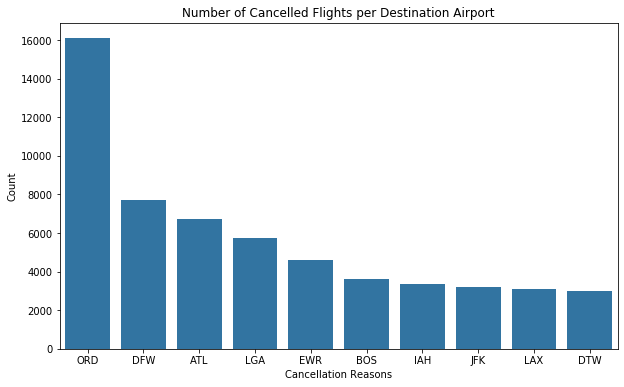

In [16]:
# using the dataframe that conatins the cancelled flights only, specifying the results order and bars color
df_cancelled=df_2008.query('Cancelled==1')
# plot the Number of Cancelled Flights per Destination Airport
plt.figure(figsize=(10,6))
order=df_cancelled.Dest.value_counts().head(10)
base_color = sb.color_palette()[0]
sb.countplot(data = df_cancelled, x = 'Dest', color = base_color, order=order.index)
plt.title('Number of Cancelled Flights per Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Cancelled Flights Counts')

Text(0, 0.5, 'Cancelled Flights Counts')

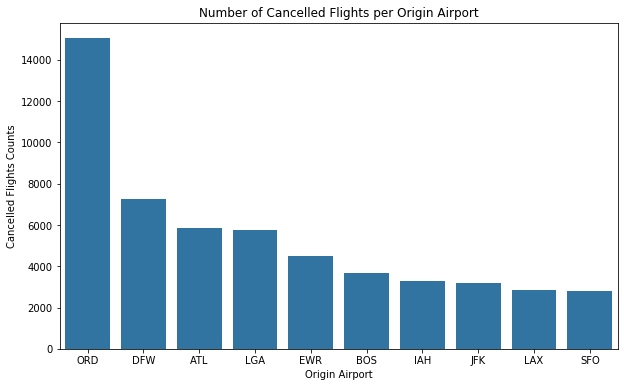

In [6]:
# using the dataframe that conatins the cancelled flights only, specifying the results order and bars color
order=df_cancelled.Origin.value_counts().head(10)
#plot Number of Cancelled Flights per Origin Airport
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 6])
sb.countplot(data = df_cancelled, x = 'Origin', color = base_color, order=order.index)
plt.title('Number of Cancelled Flights per Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Cancelled Flights Counts')

## What is the main reasons that made ORD airport come in the first place of cancellation and which month has the most cancellation?

> The charts shows that Februray month had the most cancellation and the causes are the (B:weather) first and then (C:National Aviation System (NAS)). October month came as the least month in terms of cancellation. 

Text(0, 0.5, 'Cancelled Flights Count')

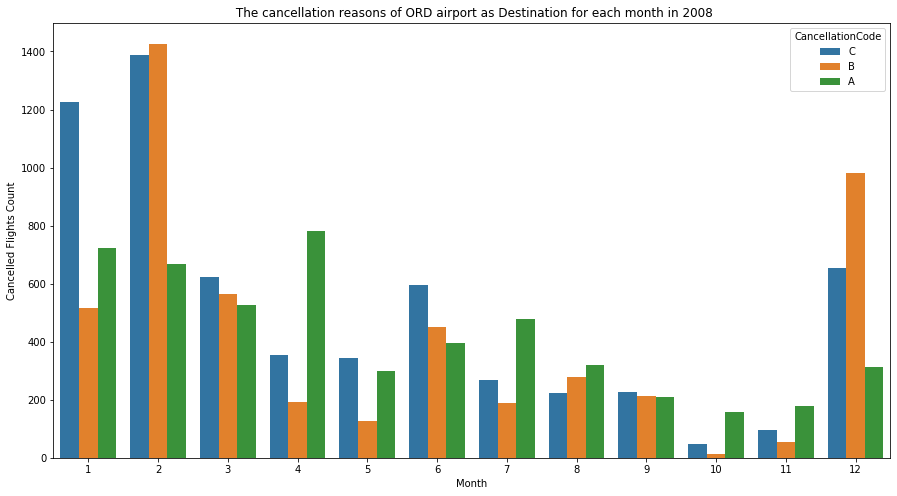

In [12]:
#create dataframe that contains only cancelled flights to the ORD destination and plot it as clustered bar charts to check the cancellation reasons for each month
df=df_2008.query('Cancelled==1 and Dest=="ORD" ')
plt.figure(figsize = [15, 8])
sb.countplot(data = df , x = 'Month', hue = 'CancellationCode' )
plt.title(' The Cancellation Reasons of ORD Airport as Destination for each Month in 2008')
plt.xlabel('Month')
plt.ylabel('Cancelled Flights Count')

Text(0, 0.5, 'Cancelled Flights Count')

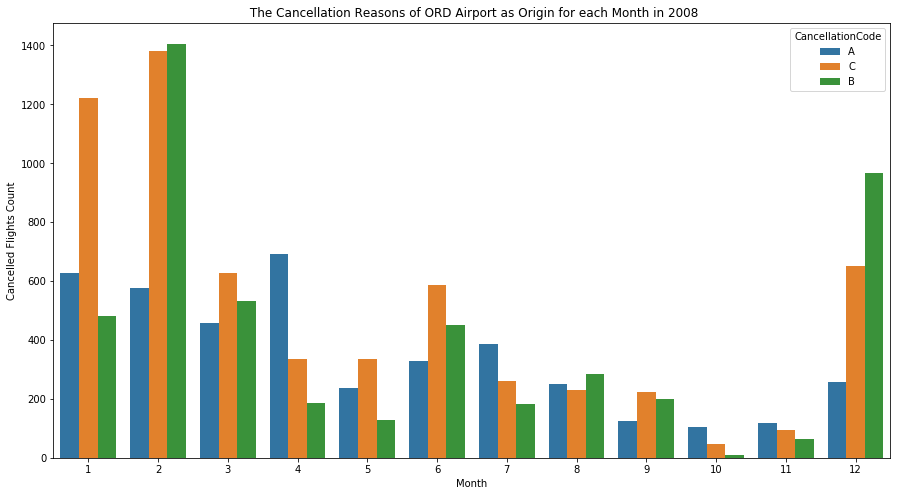

In [13]:
# create dataframe that contains only cancelled flights to the ORD origin and plot it as clustered bar charts to check the cancellation reasons for each month
df=df_2008.query('Cancelled==1 and Origin=="ORD" ')
plt.figure(figsize = [15, 8])
sb.countplot(data = df , x = 'Month', hue = 'CancellationCode')
plt.title(' The Cancellation Reasons of ORD Airport as Origin for each Month in 2008')
plt.xlabel('Month')
plt.ylabel('Cancelled Flights Count')

## What is the carrier that have high number of cancellation?
> MQ carrier had the most cancellations in 2008 followed by AA and OO.

Text(0.5, 1.0, 'Count of Cancelled Flights per Carrier in 2008')

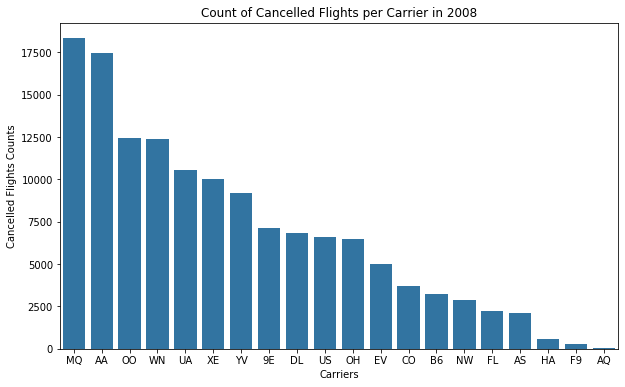

In [5]:
# take the cancelled flights only
df_cancelled=df_2008.query('Cancelled==1')
#plot the carriers with thier counts of cancelled flight, specify the order of carriers result on the plot
order=df_cancelled.UniqueCarrier.value_counts()
plt.figure(figsize = [10, 6])
sb.countplot(data = df_cancelled, x = 'UniqueCarrier', color = base_color, order=order.index)
plt.xlabel('Carriers')
plt.ylabel('Cancelled Flights Counts')
plt.title('Count of Cancelled Flights per Carrier in 2008')

## What are the carriers that have high percentage of flights arrived on time and flights depart on time?

> The blue bar show the percentage of on time arrival percentage per carrier. AQ carrier shown the best performance among other carriers in 2008 as it has the highest percentage of flights that arrived and departed on time and lowest percentages of flights delayed in the arrival and departure, it followed by HA and 9E carrieres. 

> The carriers (OH, AA) had the worst performance in terms of of delayed arrival flights.

> The carriers (WN, CO) had the worst performance in terms of delayed departure flights.

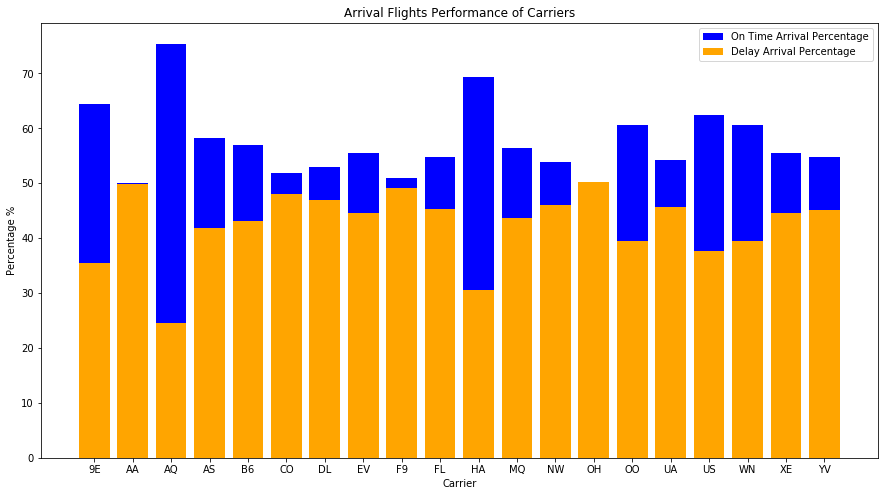

In [9]:
# create new dataframe that contains delayed departure of flights. I will use dataframe 'df_arriveDelay' that contains uncancelled and delayed arrive flights to calculate the percentage of the delayed flights
df_arriveDelay=df_2008.query('Cancelled==0 and ArrDelay>0')
ArrvDelay_flights=df_arriveDelay.groupby('UniqueCarrier')['ArrDelay'].count().reset_index(name='delayed_arrive_flights')
# create new dataframe that contains delayed departure of flights. # I will use dataframe 'df_departDelay' that contains uncancelled and delayed depart flights to calculate the percentage of the delayed flights
df_departDelay=df_2008.query('Cancelled==0 and DepDelay>0')
DepartDelay_flights=df_departDelay.groupby('UniqueCarrier')['DepDelay'].count().reset_index(name='delayed_depart_flights')
# calcualte all flights that are not cancelled
all_flights= df_2008.query('Cancelled==0').groupby('UniqueCarrier').size().reset_index(name='flights_count')
# merge the above dataframes
flights_percent=pd.merge(ArrvDelay_flights,  DepartDelay_flights, on= 'UniqueCarrier')
flights_percent=pd.merge(flights_percent,  all_flights, on= 'UniqueCarrier')
#calculate the percentage of delay arrival and on time arrival flights per carrier             
flights_percent['delay_arrive_percentage']=(flights_percent['delayed_arrive_flights']/flights_percent['flights_count'])*100
flights_percent['onTime_arrive_percentage']=100-flights_percent['delay_arrive_percentage']
#calculate the percentage of delay departuer and on time departure flights per carrier 
flights_percent['delay_depart_percentage']=(flights_percent['delayed_depart_flights']/flights_percent['flights_count'])*100
flights_percent['onTime_depart_percentage']=100-flights_percent['delay_depart_percentage']
# round the percentage to 1 deimal digit
flights_percent['delay_arrive_percentage']=round(flights_percent['delay_arrive_percentage'],1)
flights_percent['onTime_arrive_percentage']=round(flights_percent['onTime_arrive_percentage'],1)
flights_percent['delay_depart_percentage']=round(flights_percent['delay_depart_percentage'],1)
flights_percent['onTime_depart_percentage']=round(flights_percent['onTime_depart_percentage'],1)
# plot the performance of each carrier in terms of delay arrival percentage and on time arrival percentage
plt.figure(figsize=(15,8))
plt.bar(data = flights_percent, x = 'UniqueCarrier', height = 'onTime_arrive_percentage' , color = 'blue')
plt.bar(data = flights_percent, x = 'UniqueCarrier', height = 'delay_arrive_percentage' , color = 'orange')
orange='Delay Arrival Percentage'
blue='On Time Arrival Percentage'
plt.xlabel('Carrier')
plt.ylabel('Percentage %')
plt.title('Arrival Flights Performance of Carriers')
plt.legend([blue, orange])

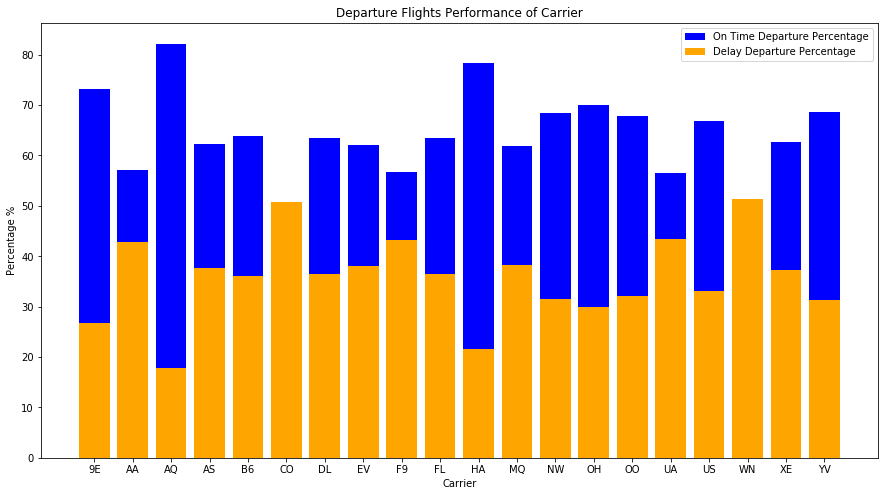

In [10]:
# plot the performance of each carrier in terms of delay departure percentage and on time departure percentage
plt.figure(figsize=(15,8))
plt.bar(data = flights_percent, x = 'UniqueCarrier', height = 'onTime_depart_percentage' , color = 'blue')
plt.bar(data = flights_percent, x = 'UniqueCarrier', height = 'delay_depart_percentage' , color = 'orange')
orange='Delay Departure Percentage'
blue='On Time Departure Percentage'
plt.xlabel('Carrier')
plt.ylabel('Percentage %')
plt.title('Departure Flights Performance of Carrier')
plt.legend([blue, orange])

## How is the relation between delay in the departuer with the delay in the arrival?
>There is a positive relationship between arrival delay and departure delay where when the departure delays time increased, the arrival delayes time is also increased.

Text(0.5, 1.0, 'Relationship between Departure Delay and Arrival Delay')

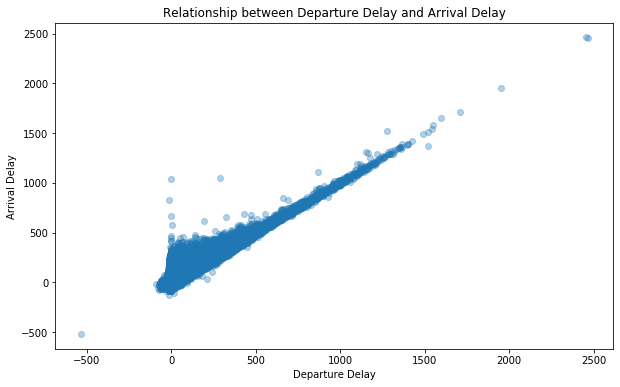

In [11]:
# Exclude the cancelled flights from the data 
df_flights=df_2008.query('Cancelled==0')
plt.figure(figsize=(10,6))
plt.scatter(data=df_flights , x='DepDelay', y='ArrDelay', alpha=1/3)
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.title('Relationship between Departure Delay and Arrival Delay')

## How is the distribution of Average departure delay among months in 2008?

> The line chart below shows that the peak of the delay in the departure were in February, June, and December. The whether and holiday might played role in the delay but they are not very related as the delay was variant among winter months and holidays.  

Text(0.5, 1.0, 'Distribution of Average Departure Delay Among Months in 2008')

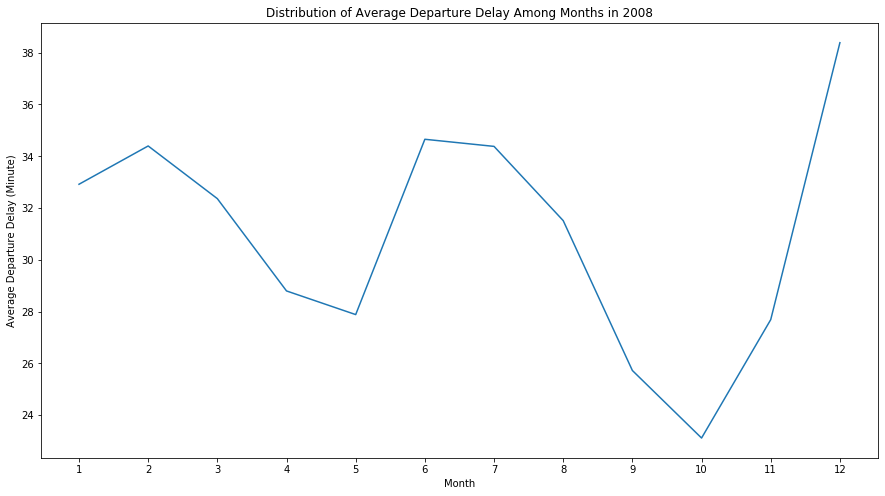

In [12]:
# Create a datafram contains the average departure delay per months
depart_delay=df_2008.query('Cancelled==0 and DepDelay>0').groupby('Month')['DepDelay'].mean().reset_index(name='Depart_delay_average')
# plot the distribution
plt.figure(figsize = [15, 8])
base_color = sb.color_palette()[0]
plt.errorbar(data = depart_delay, x = 'Month', y = 'Depart_delay_average', color = base_color)
plt.xticks( depart_delay.Month.index +1 )
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (Minute)')
plt.title('Distribution of Average Departure Delay Among Months in 2008')

## What are the main causes for delays in all months in 2008?

> Whether and late aircraft delay were the main causes for arrival delay in 2008.


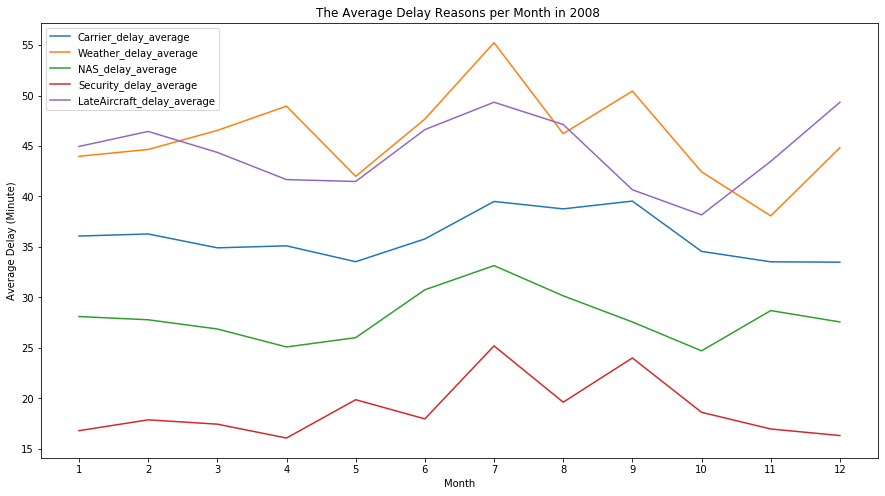

In [13]:
# create datafram for each type of the delay contains the average delay per month
Carrier_delay=df_2008.query('Cancelled==0 and CarrierDelay>0').groupby('Month')['CarrierDelay'].mean().reset_index(name='Carrier_delay_average')
Weather_delay=df_2008.query('Cancelled==0 and WeatherDelay>0').groupby('Month')['WeatherDelay'].mean().reset_index(name='Weather_delay_average')
NAS_delay=df_2008.query('Cancelled==0 and NASDelay>0').groupby('Month')['NASDelay'].mean().reset_index(name='NAS_delay_average')
Security_delay=df_2008.query('Cancelled==0 and SecurityDelay>0').groupby('Month')['SecurityDelay'].mean().reset_index(name='Security_delay_average')
LateAircraft_delay=df_2008.query('Cancelled==0 and LateAircraftDelay>0').groupby('Month')['LateAircraftDelay'].mean().reset_index(name='LateAircraft_delay_average')
# create line chart for each type
plt.figure(figsize = [15, 8])
plt.errorbar(data = Carrier_delay, x = 'Month', y = 'Carrier_delay_average' )
plt.errorbar(data = Weather_delay, x = 'Month', y = 'Weather_delay_average' )
plt.errorbar(data = NAS_delay, x = 'Month', y = 'NAS_delay_average' )
plt.errorbar(data = Security_delay, x = 'Month', y = 'Security_delay_average' )
plt.errorbar(data = LateAircraft_delay, x = 'Month', y = 'LateAircraft_delay_average' )
plt.xticks(Carrier_delay.Month)
plt.xlabel('Month')
plt.ylabel('Average Delay (Minute)')
plt.title('The Average Delay Reasons per Month in 2008 ')
plt.legend()